In [3]:
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%precision 3

'%.3f'

### 정규분포의 확률밀도

In [6]:
np.pi

3.142

In [7]:
np.exp(1)

2.718281828459045

In [8]:
x = 3
mu = 4
sigma = 0.8

1 / (np.sqrt(2 * np.pi * sigma**2)) * np.exp(-((x - mu)**2) / (2 * sigma**2))

0.22831135673627742

In [9]:
stats.norm.pdf(loc=4, scale=0.8, x=3)

0.2283113567362774

In [10]:
norm_dist = stats.norm(loc=4, scale=0.8)
norm_dist.pdf(x=3)

0.2283113567362774

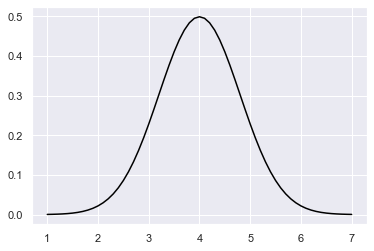

In [11]:
# 정규분포의 확률밀도
x_plot = np.arange(1, 7.1, 0.1)
plt.plot(x_plot,
         stats.norm.pdf(x=x_plot, loc=4, scale=0.8),
         color="black")

In [14]:
# 표본이 어떤 값 이하가 되는 비율
np.random.seed(1)
simulated_sample = stats.norm.rvs(loc=4, scale=0.8, size=100000)
simulated_sample

array([5.299, 3.511, 3.577, ..., 4.065, 4.275, 3.402])

In [15]:
np.sum(simulated_sample <= 3)

10371

In [16]:
np.sum(simulated_sample <= 3) / len(simulated_sample)

0.10371

In [17]:
# 누적분포함수
stats.norm.cdf(loc=4, scale=0.8, x=3)

0.10564977366685535

In [18]:
stats.norm.cdf(loc=4, scale=0.8, x=4)

0.5

In [19]:
# 하측확률와 퍼센트포인트
stats.norm.ppf(loc=4, scale=0.8, q=0.025) # ppf : Percent Point Function

2.4320288123679563

In [20]:
lower = stats.norm.cdf(loc=4, scale=0.8, x=3)
stats.norm.ppf(loc=4, scale=0.8, q=lower)

3.0000000000000004

In [21]:
stats.norm.ppf(loc=4, scale=0.8, q=0.5)

4.0

In [22]:
# t값 = (표본평균 - 모평균) / 표준오차, 표준오차는 표본평균의 표준편차라고 할 수 있다.
# t값의 표본분포
np.random.seed(1)

# t값을 저장할 변수 설정
t_value_array = np.zeros(10000)

# 정규분포 클래스의 인스턴스
norm_dist = stats.norm(loc=4, scale=0.8)

# 시뮬레이션 실행
for i in range(0, 10000):
    sample = norm_dist.rvs(size=10)
    sample_mean = np.mean(sample)
    sample_std = np.std(sample, ddof=1)
    sample_se = sample_std / np.sqrt(len(sample))
    t_value_array[i] = (sample_mean - 4) / sample_se

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


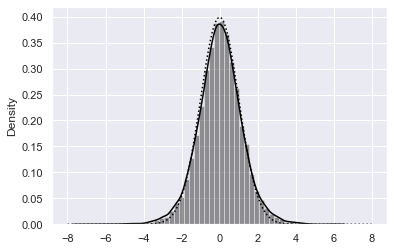

In [35]:
# t값의 히스토그램
sns.distplot(t_value_array, color="black")

# 표준정규분포의 확률밀도
x = np.arange(start=-8, stop=8.1, step=0.1)
plt.plot(x, stats.norm.pdf(x=x), color="black", linestyle="dotted")

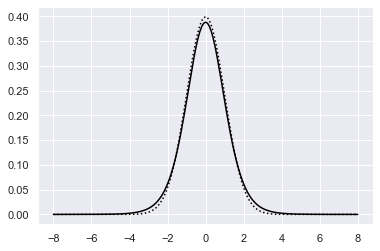

In [38]:
# t분포 : 모집단의 분포가 정규분포일 때 t값의 표본분포를 t분포라고 합니다
plt.plot(x, stats.norm.pdf(x=x), color="black", linestyle="dotted")
plt.plot(x, stats.t.pdf(x=x, df=9), color="black")

C:\Users\HYUNJUN\anaconda3\envs\deep-learning-gpu\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


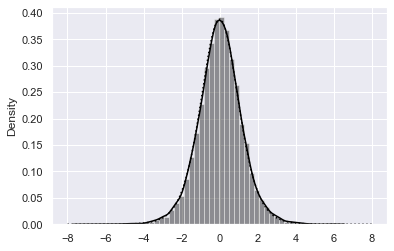

In [40]:
sns.distplot(t_value_array, color="black", norm_hist=True)
plt.plot(x, stats.t.pdf(x=x, df=9), color="black", linestyle="dotted")